In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import json
from collections import Counter
import time
import seaborn as sns
from communitygraph.bipartite import BipartiteCommunity as bp
import communitygraph.util as util

In [3]:
PATH = os.path.join(os.getcwd(), 'data/100k_a.csv')

In [4]:
df = pd.read_csv(PATH, names=['user_id', 'stream_id', 'streamer_name', 'start_time', 'stop_time'])

In [5]:
twitch = bp(df, 'user_id', 'streamer_name', min_item_degree=50)

Initializing...
Filtering dataframe...
Adding nodes...
Adding edges...
Completed.



In [6]:
twitch.describe_bipartite()

Total # of edges (interactions): 2367976

# of unique user_id: 97027
# of unique streamer_name: 6561
# of unique edges: 1063130

Average user_id weighted degree: 24.405330475022417
Average streamer_name weighted degree: 360.91693339429963
Average edge weight: 2.2273625991176997



In [7]:
partition = twitch.partition_items()

Starting partition of items with resolution 1.0...
Starting weighted projection...
Finished weighted projection in 276.55392384529114

Finished partition in 351.4926700592041


In [12]:
projected = twitch.project_onto_items()

In [13]:
community_louvain.modularity(partition, projected)

0.48250424482674

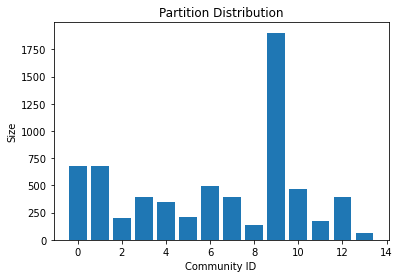

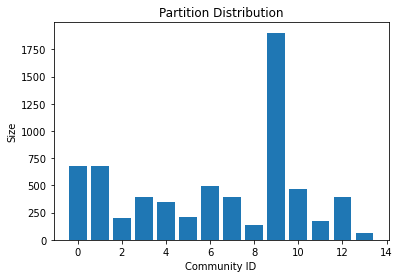

In [14]:
util.plot_partition_distribution(partition)

In [15]:
new_df = util.label_df_partition(df, 'streamer_name', partition)

In [16]:
new_df.to_csv(path_or_buf='/raid/home/myang349/cse8803-project/twitch/data/modified_100k.csv')

In [18]:
new_df

,user_id,stream_id,streamer_name,start_time,stop_time,community
0,1,33842865744,mithrain,154,156,5
1,1,33846768288,alptv,166,169,5
2,1,33886469056,mithrain,587,588,5
3,1,33887624992,wtcn,589,591,5
4,1,33890145056,jrokezftw,591,594,5
...,...,...,...,...,...,...
3051728,100000,34167930576,mckytv,3582,3583,3
3051729,100000,34168288656,natehill,3582,3583,0
3051730,100000,34169594512,fortnite,3582,3584,0
3051731,100000,34180223072,highdistortion,3709,3711,0


In [22]:
nx.algorithms.community.partition_quality(projected, partition)

NetworkXError: `partition` is not a valid partition of the nodes of G

In [24]:
len(partition)

6561

In [25]:
len(set(projected.nodes))

6561

In [28]:
nx.algorithms.community.is_partition(projected, partition)

False